In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [0]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_to_dogs.zip', origin = url, extract = True)

In [0]:
path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [56]:
train_dir = os.path.join(path, 'train')
valid_dir = os.path.join(path, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats') 
train_dogs_dir = os.path.join(train_dir, 'dogs') 
validation_cats_dir = os.path.join(valid_dir, 'cats') 
validation_dogs_dir = os.path.join(valid_dir, 'dogs')

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 128
epochs = 15
IMG_H = 150
IMG_W = 150

train_img = ImageDataGenerator(rescale = 1./255, rotation_range=45, width_shift_range=0.15, height_shift_range=0.15, horizontal_flip = True, zoom_range=0.5)
valid_img = ImageDataGenerator(rescale = 1./255)

train_data = train_img.flow_from_directory(batch_size = 128, directory = train_dir, shuffle = True, target_size = (IMG_H, IMG_W), class_mode = 'binary')
valid_data = valid_img.flow_from_directory(batch_size = 128, directory = valid_dir, shuffle = True, target_size = (IMG_H, IMG_W), class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


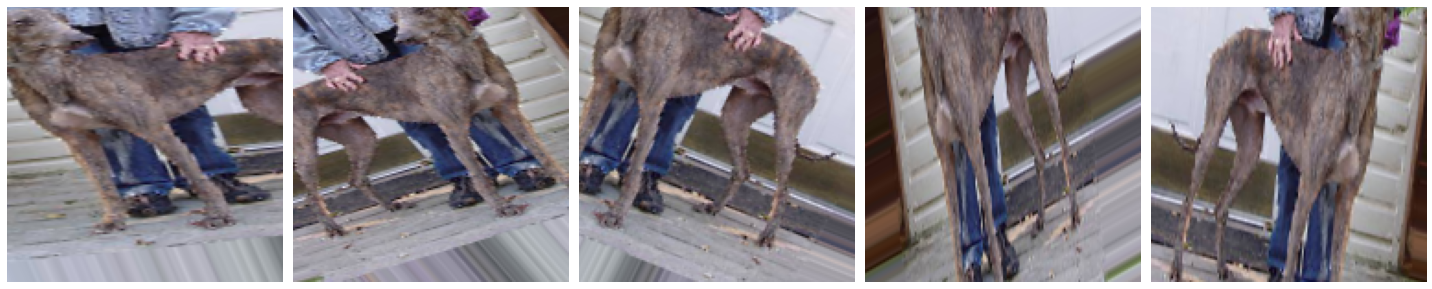

In [57]:
sample, _ = next(train_data)
augmented = [train_data[0][0][0] for i in range(5)]

def plotImg(imgs):
  fig, axes = plt.subplots(1, 5, figsize = (20,20))
  axes = axes.flatten()
  for img, ax in zip(imgs, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

plotImg(augmented)

In [0]:
model = Sequential([
                    Conv2D(16, 3, padding='same', activation = 'relu', input_shape = (IMG_H, IMG_W, 3)),
                    MaxPooling2D(),
                    Dropout(0.2),
                    Conv2D(32, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Conv2D(64, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.2),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1)
])

In [59]:
model.compile(optimizer = 'adam', loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics = ['accuracy'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 18, 18, 64)      

In [60]:
history = model.fit_generator(
    train_data,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=valid_data,
    validation_steps=total_val // batch_size
)

Epoch 1/15
15/15 [==============================] - 57s 4s/step - loss: 0.9543 - accuracy: 0.3574 - val_loss: 0.6931 - val_accuracy: 0.4967
Epoch 2/15
15/15 [==============================] - 57s 4s/step - loss: 0.6936 - accuracy: 0.5011 - val_loss: 0.6926 - val_accuracy: 0.5115
Epoch 3/15
15/15 [==============================] - 57s 4s/step - loss: 0.6925 - accuracy: 0.5010 - val_loss: 0.6913 - val_accuracy: 0.5023
Epoch 4/15
15/15 [==============================] - 55s 4s/step - loss: 0.6904 - accuracy: 0.5011 - val_loss: 0.6932 - val_accuracy: 0.4782
Epoch 5/15
15/15 [==============================] - 57s 4s/step - loss: 0.6869 - accuracy: 0.4880 - val_loss: 0.6859 - val_accuracy: 0.4828
Epoch 6/15
15/15 [==============================] - 55s 4s/step - loss: 0.6822 - accuracy: 0.4748 - val_loss: 0.6551 - val_accuracy: 0.4186
Epoch 7/15
15/15 [==============================] - 57s 4s/step - loss: 0.6724 - accuracy: 0.4354 - val_loss: 0.7103 - val_accuracy: 0.4644
Epoch 8/15
15/15 [==